In [79]:
import pandas as pd
import numpy as np

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [81]:
train = pd.read_csv('titanic_train.csv')

In [82]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

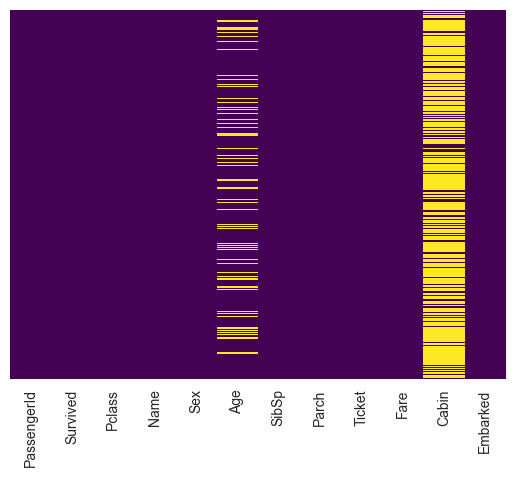

In [83]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [84]:
sns.set_style('whitegrid')

<Axes: xlabel='Survived', ylabel='count'>

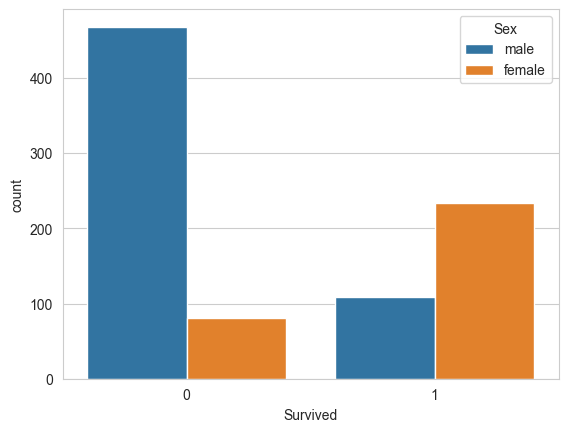

In [85]:
sns.countplot(x='Survived',hue='Sex', data=train)

<Axes: xlabel='Survived', ylabel='count'>

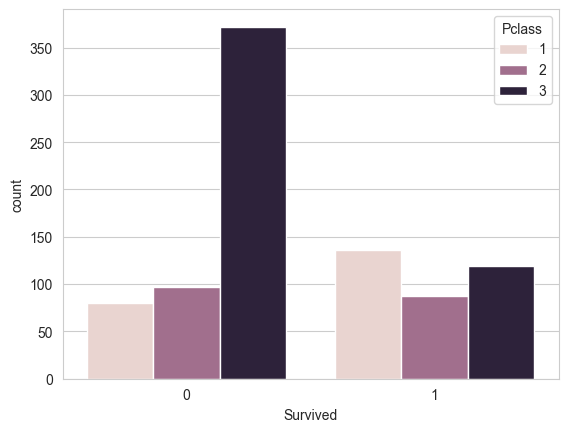

In [86]:
sns.countplot(x='Survived',hue='Pclass', data=train)

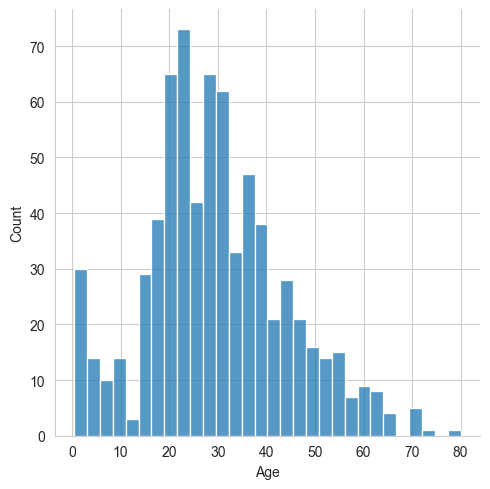

In [87]:
sns.displot(train['Age'].dropna(),kde=False,bins=30)

<Axes: ylabel='Frequency'>

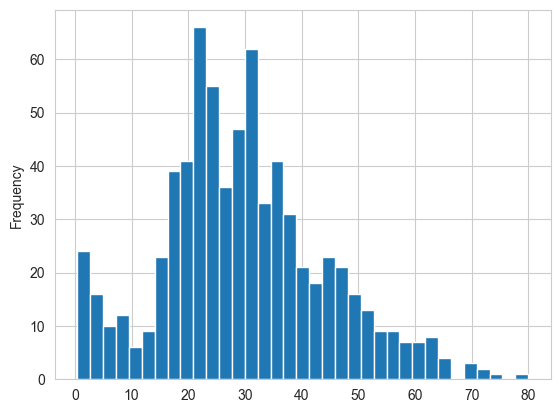

In [88]:
train['Age'].plot.hist(bins=35)

In [89]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='SibSp', ylabel='count'>

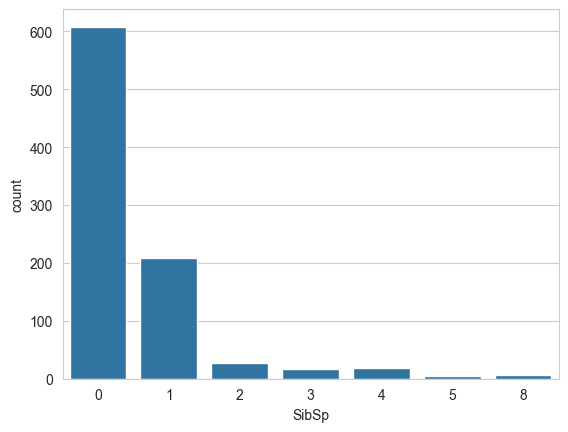

In [90]:
sns.countplot(x='SibSp',data=train)

<Axes: >

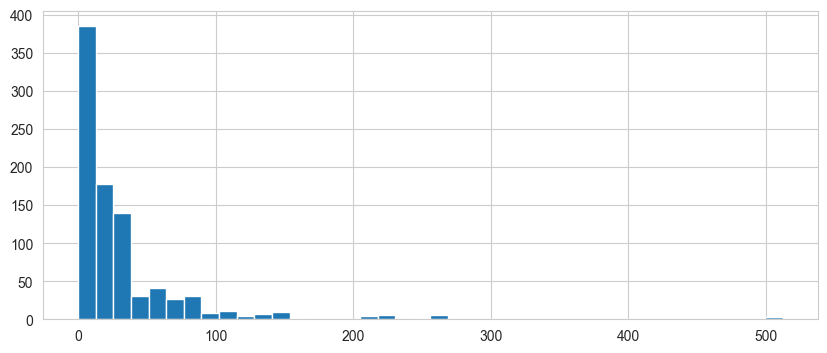

In [91]:
train['Fare'].hist(bins =40,figsize=(10,4))

In [20]:
pip install cufflinks

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 818.2 kB/s  0:00:01eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 430.2 kB/s  0:00:04 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 619.4 kB/s  0:00:15m0:00:0100:01
Using cached setuptools-80.9.0-py3-none-any.whl (1.2 MB)
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=67706 sha256=75be506360dcec57c6c2555ae0987e9d930915a9b54eefe46916d3b6c29c3e45
  Stored in directory: /Users/prabhavihemachandra/Library/Caches/pip/wheels/13/bc/65/1ac45445dba1052b5e837dc49f5282c8cb2f934ae9e6f62f0e
Successfully built cufflinks
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [cufflinks]/8 [cufflinks]]
Note: you may need to restart the kernel to use updated packages.


In [21]:
import cufflinks as cf

In [22]:
cf.go_offline()

<Axes: xlabel='Pclass', ylabel='Age'>

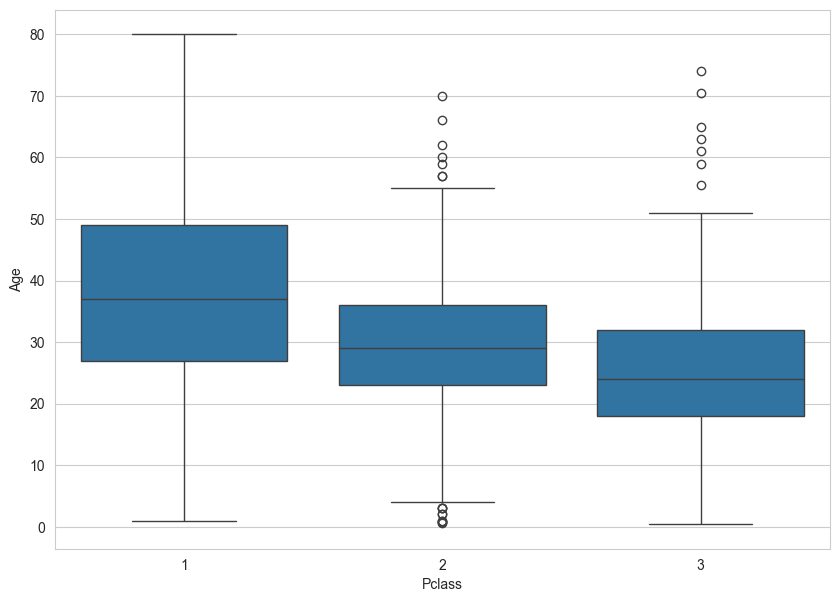

In [92]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [94]:
def impute_age(cols):
    Age = cols[0]
    Pclass= cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age

In [96]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

/var/folders/lq/n9ml65xd30bg7w89g6w4__hw0000gn/T/ipykernel_3168/677823520.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/var/folders/lq/n9ml65xd30bg7w89g6w4__hw0000gn/T/ipykernel_3168/677823520.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



<Axes: >

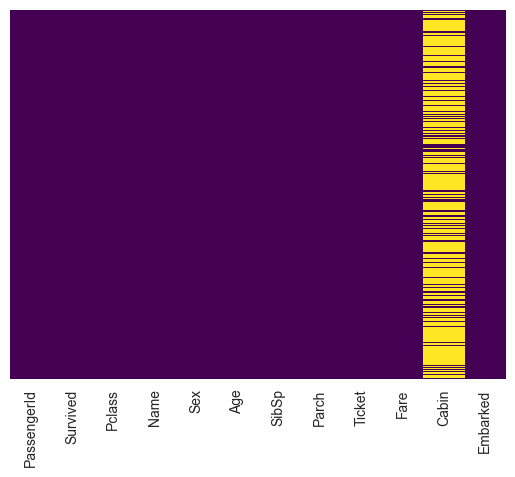

In [97]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [98]:
train.drop('Cabin',axis=1,inplace=True)

In [99]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

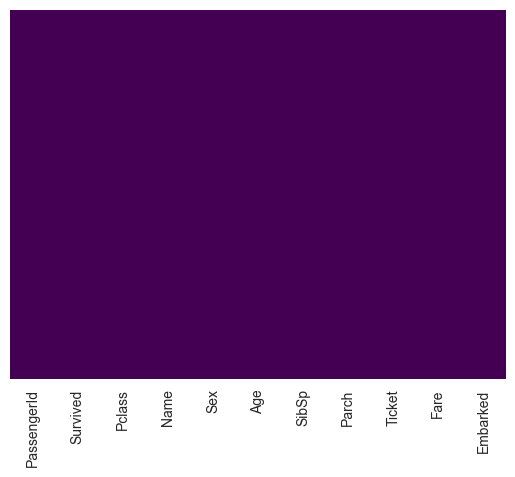

In [100]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [101]:
sex=pd.get_dummies(train['Sex'],drop_first=True,dtype=int)

In [102]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [103]:
embark= pd.get_dummies(train['Embarked'],drop_first=True,dtype=int)

In [104]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [105]:
train =pd.concat([train,sex,embark],axis=1)

In [106]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [107]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0


In [108]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [109]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [110]:
train.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
886,887,0,2,27.0,0,0,13.00,1,0,1
887,888,1,1,19.0,0,0,30.00,0,0,1
888,889,0,3,24.0,1,2,23.45,0,0,1
889,890,1,1,26.0,0,0,30.00,1,0,0
890,891,0,3,32.0,0,0,7.75,1,1,0


In [112]:
train.drop('PassengerId',axis=1,inplace=True)

In [113]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
